## Setup and Data Preparation

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_csv('/content/Movie_regression.csv', header=0)

In [62]:
df.head(5)

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [0]:
df.Time_taken.fillna(df['Time_taken'].mean(), inplace=True)

In [65]:
sum(df.Time_taken.isna())

0

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [0]:
df = pd.get_dummies(df, columns=['3D_available', 'Genre'], drop_first=True)

In [68]:
df.head(5)

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,0,1,0


In [69]:
X = df.loc[:, df.columns!='Collection']
X.shape

(506, 19)

In [70]:
X.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,0,0,1,0


In [71]:
y = df.Collection
y.shape

(506,)

In [72]:
y.head(5)

0    48000
1    43200
2    69400
3    66800
4    72400
Name: Collection, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape)

(404, 19) (102, 19) (404,)


In [75]:
X_train.head(5)

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
220,27.1618,67.40,0.493,38612.805,162.0,8.485,8.640,8.485,8.670,8.52,480270,174.68,224.272,23,536,0,0,0,1
71,23.1752,76.62,0.587,33113.355,91.0,7.280,7.400,7.290,7.455,8.16,491978,200.68,263.472,46,400,0,0,0,0
240,22.2658,64.86,0.572,38312.835,127.8,6.755,6.935,6.800,6.840,8.68,470107,204.80,224.320,24,387,1,1,0,0
6,21.7658,70.74,0.476,33396.660,140.1,7.065,7.265,7.150,7.400,8.96,459241,139.16,243.664,41,522,1,0,0,1
417,538.8120,91.20,0.321,29463.720,162.6,9.135,9.305,9.095,9.165,6.96,302776,172.16,301.664,60,589,1,0,0,0


## Decision Tree

### Regression

In [0]:
from sklearn.tree import DecisionTreeRegressor
regtree = DecisionTreeRegressor(max_depth=3)

In [77]:
regtree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [0]:
y_pred = regtree.predict(X_test)

In [0]:
from sklearn.metrics import r2_score, mean_squared_error

In [80]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('R2 score: ', r2)
print('Mean Squared Error: ', mse)

R2 score:  0.707165453856755
Mean Squared Error:  94270653.74813624


In [0]:
from sklearn.tree import export_graphviz

In [0]:
dot_data = export_graphviz(regtree, out_file=None)

In [0]:
from IPython.display import Image
import pydotplus

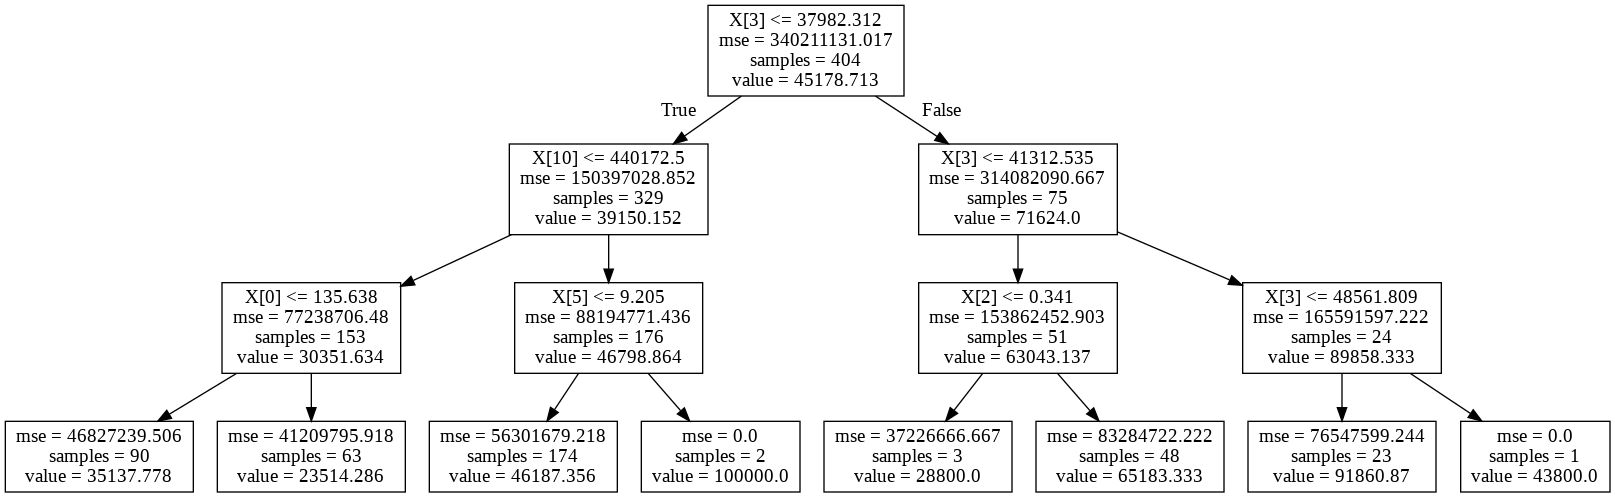

In [84]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

#### Controlling Tree Growth

##### Maximum number of levels in Tree

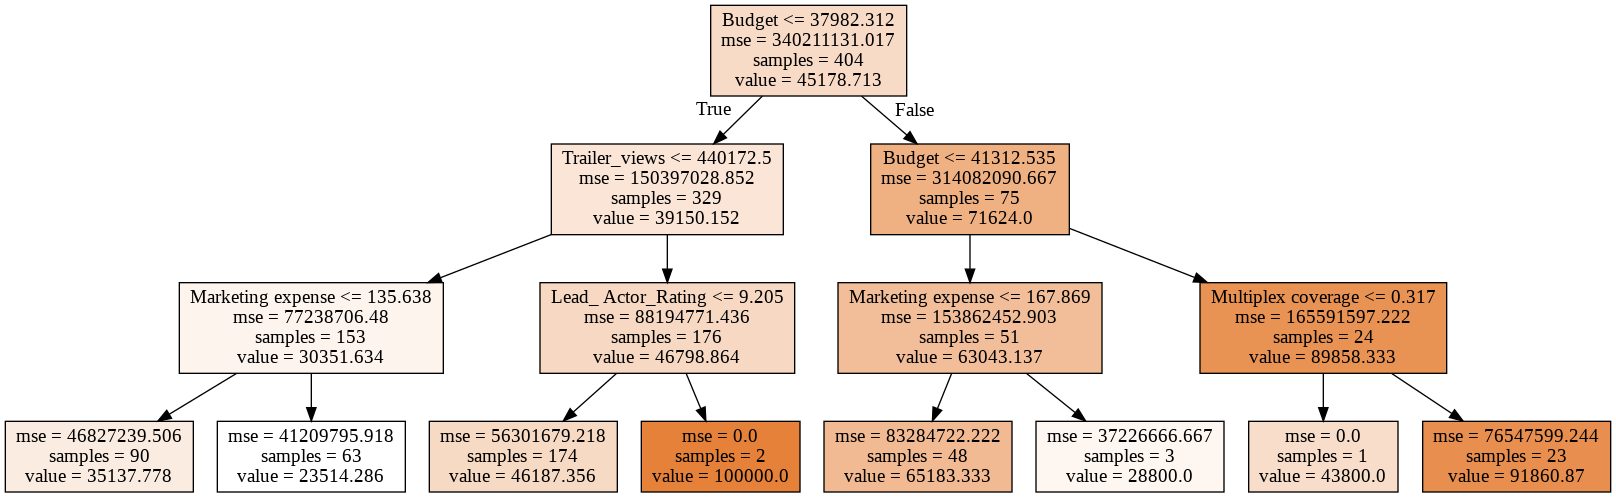

In [85]:
regtree1 = DecisionTreeRegressor(max_depth=3)
regtree1.fit(X_train, y_train)
dot_data = export_graphviz(regtree1, out_file=None, feature_names=X_train.columns, filled=True)
graph1 = pydotplus.graph_from_dot_data(dot_data)
Image(graph1.create_png())

##### Minimum observations at internal node

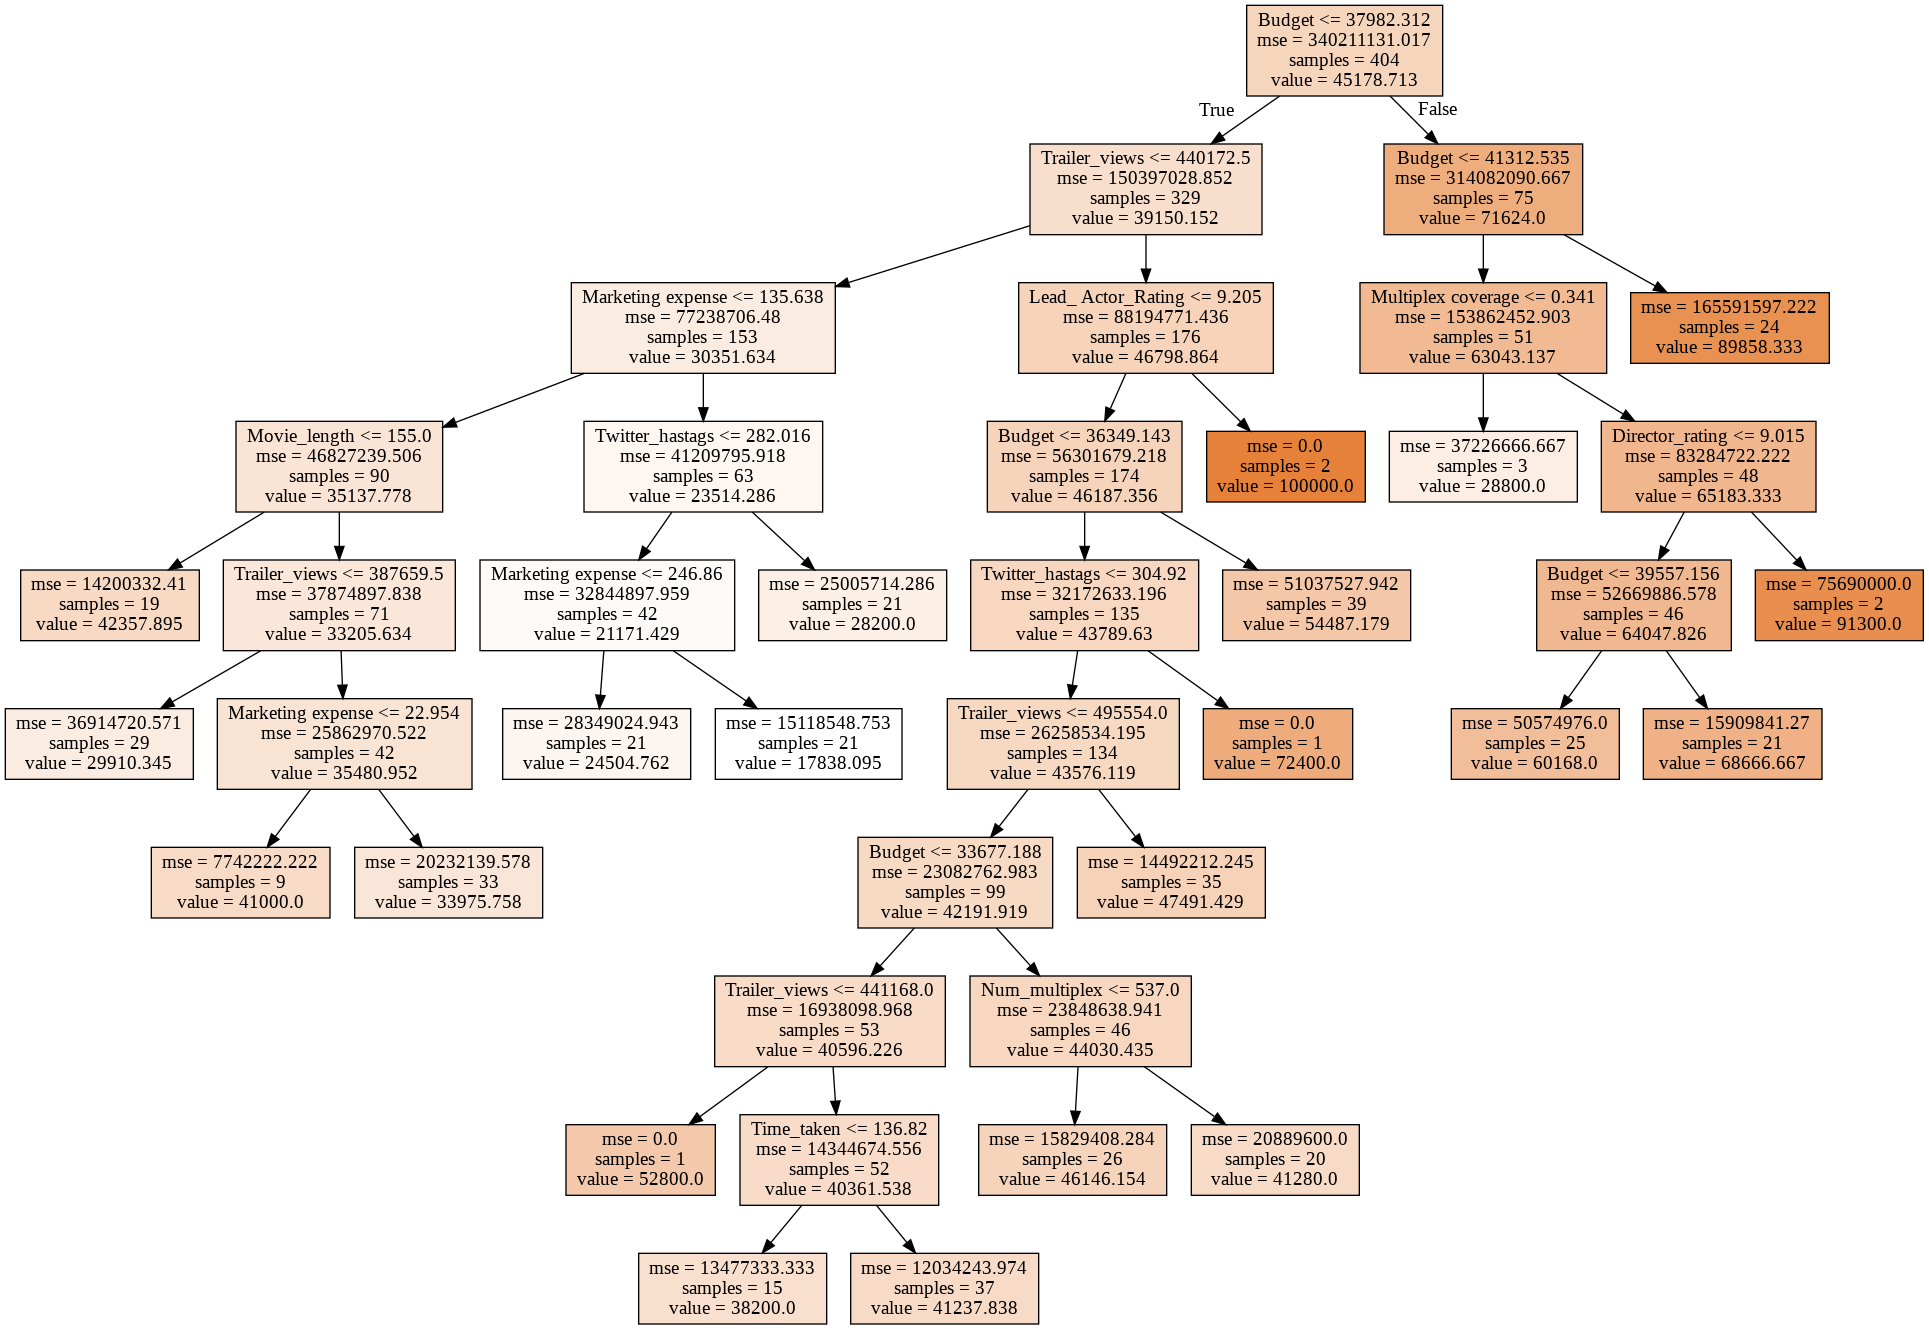

In [86]:
regtree2 = DecisionTreeRegressor(min_samples_split=40)
regtree2.fit(X_train, y_train)
dot_data = export_graphviz(regtree2, out_file=None, feature_names=X_train.columns, filled=True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

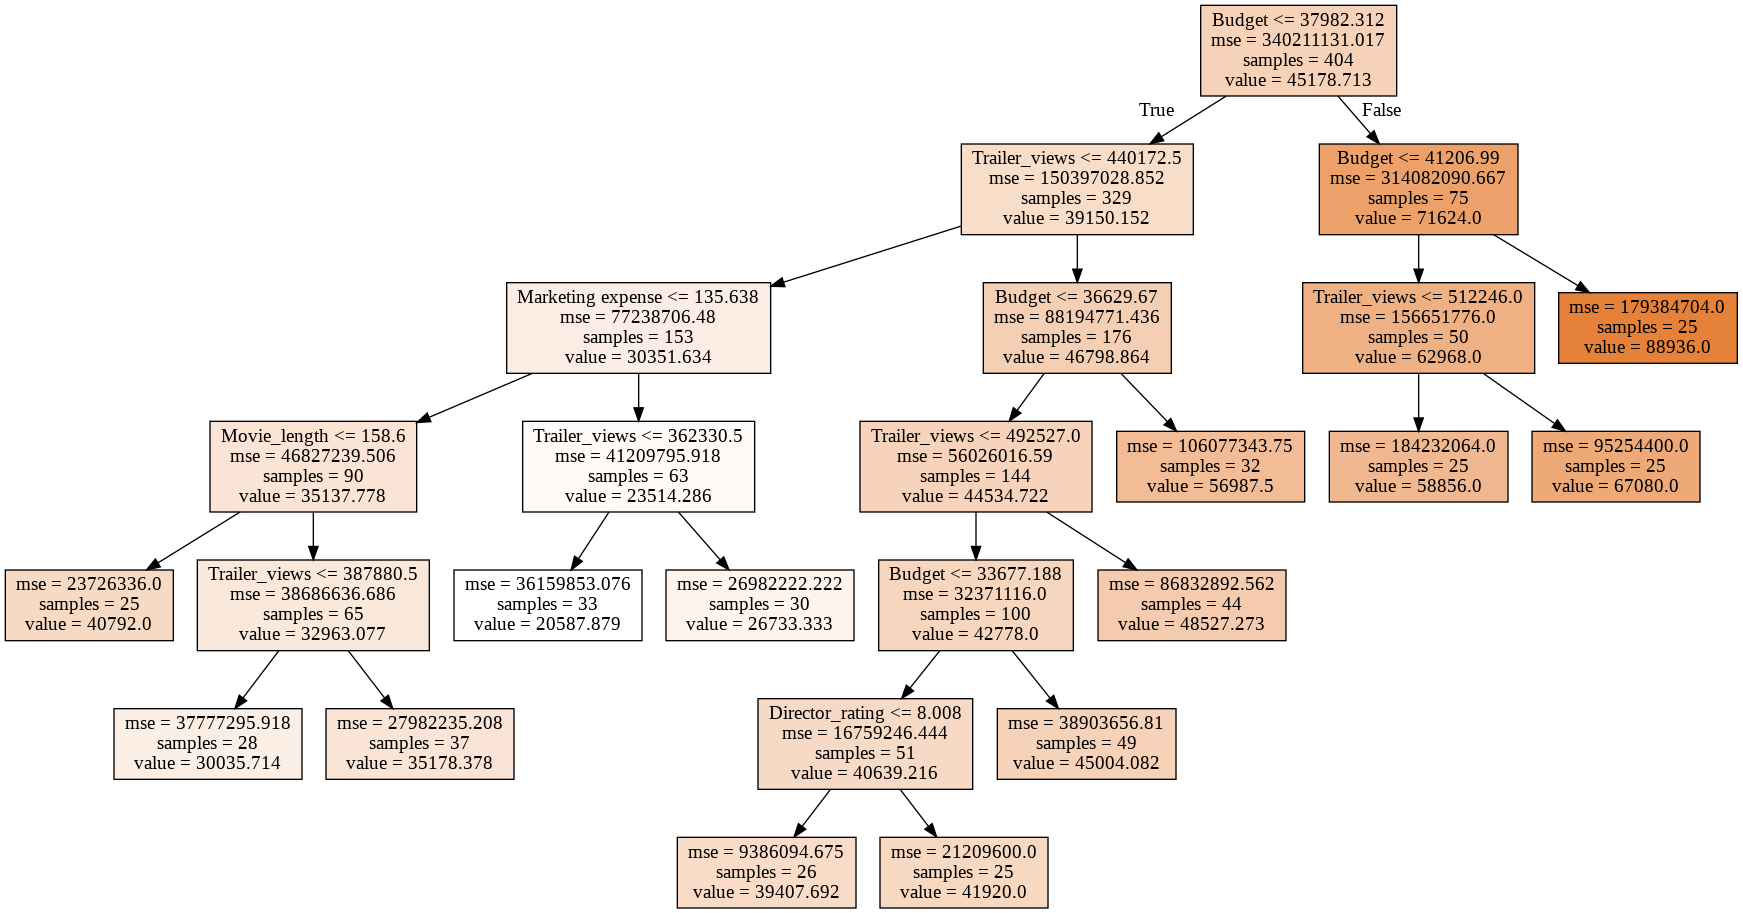

In [87]:
regtree3 = DecisionTreeRegressor(min_samples_leaf=25)
regtree3.fit(X_train, y_train)
dot_data = export_graphviz(regtree3, out_file=None, feature_names=X_train.columns, filled=True)
graph3 = pydotplus.graph_from_dot_data(dot_data)
Image(graph3.create_png())

### Classification

In [0]:
df = pd.read_csv('/content/Movie_classification.csv', header=0)

In [89]:
df.head(5)

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [91]:
df.Time_taken.fillna(df.Time_taken.mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [92]:
df = pd.get_dummies(df, columns=['Genre', '3D_available'], drop_first=True)
df.head(5)

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,Genre_Comedy,Genre_Drama,Genre_Thriller,3D_available_YES
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,0,0,1,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,0,1,0,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,1,1,0,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1,0,1,0,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,1,0,1,0,0


In [93]:
X = df.loc[:, df.columns!='Start_Tech_Oscar']
X.shape

(506, 20)

In [94]:
X.head(5)

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Genre_Comedy,Genre_Drama,Genre_Thriller,3D_available_YES
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,0,0,1,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,1,0,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,1,0,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,0,1,0,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,1,0,0


In [95]:
y = df.Start_Tech_Oscar
y.shape

(506,)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape)

(404, 20) (102, 20) (404,)


In [0]:
from sklearn.tree import DecisionTreeClassifier
clftree = DecisionTreeClassifier(max_depth=3)

In [0]:
clftree.fit(X_train, y_train)
y_pred = clftree.predict(X_test)

In [0]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

In [100]:
accuracy = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', cm)

Confusion Matrix: 
 [[39  5]
 [41 17]]


In [101]:
print('Accuracy: ', accuracy)
print('ROC: ', roc)

Accuracy:  0.5490196078431373
ROC:  0.5897335423197492


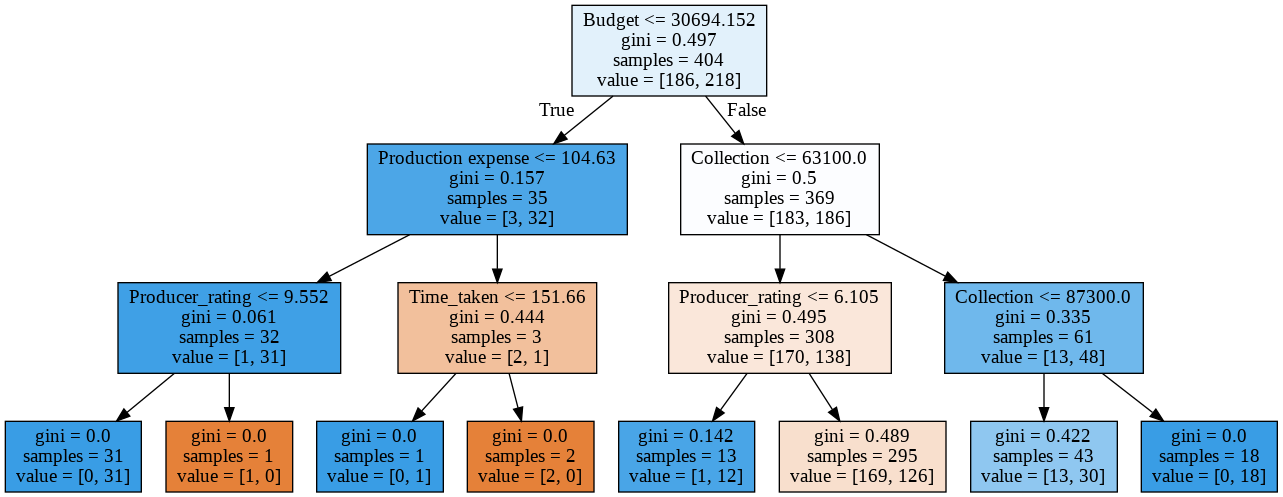

In [102]:
dot_data = export_graphviz(clftree, out_file=None, feature_names=X_train.columns, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

#### Controlling Tree Growth (pruning)

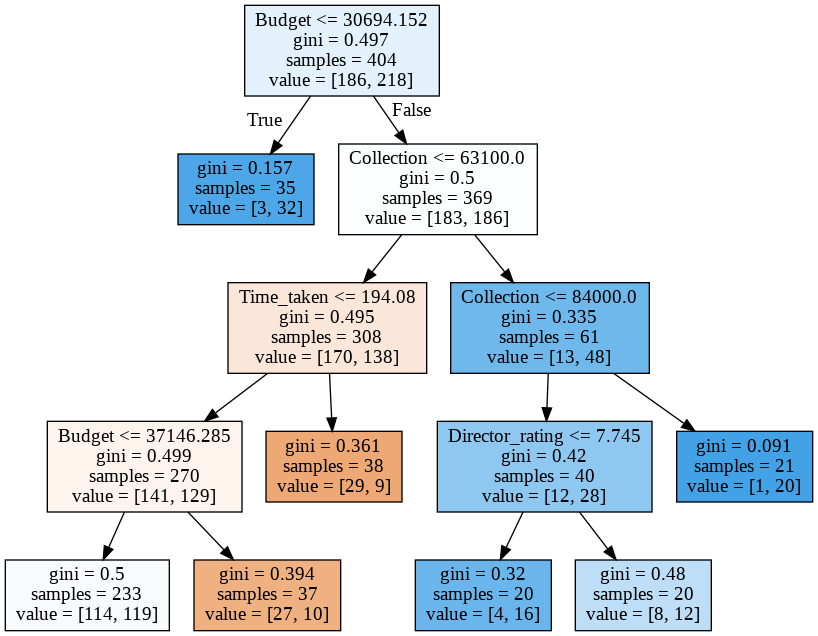

In [103]:
clftree2 = DecisionTreeClassifier(min_samples_leaf=20, max_depth=4)
clftree2.fit(X_train, y_train)
dot_data = export_graphviz(clftree2, out_file=None, feature_names=X_train.columns, filled=True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

In [104]:
accuracy_score(y_test, clftree2.predict(X_test))

0.5588235294117647

## Bagging

In [0]:
from sklearn.ensemble import BaggingClassifier

In [0]:
clftree = DecisionTreeClassifier()
bagclf = BaggingClassifier(base_estimator=clftree, n_estimators=1000, bootstrap=True, n_jobs=1, random_state=42)

In [107]:
bagclf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [0]:
cm = confusion_matrix(y_test, bagclf.predict(X_test))

In [109]:
print(cm)

[[28 16]
 [21 37]]


In [110]:
accuracy_score(y_test, bagclf.predict(X_test))

0.6372549019607843

## Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [112]:
rfclf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [113]:
confusion_matrix(y_test, rfclf.predict(X_test))

array([[23, 21],
       [21, 37]])

In [114]:
accuracy_score(y_test, rfclf.predict(X_test))

0.5882352941176471

### Grid Search CV

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
rfclf = RandomForestClassifier(n_estimators=250, random_state=42)
params = {'max_features': [4,5,6,7,8,9,10],
          'min_samples_split': [2,3,4,5,6,7,8,9,10],
          'n_estimators': [250,500,750,100]}

In [0]:
grid_search = GridSearchCV(rfclf, param_grid=params, scoring='accuracy', n_jobs=-1, cv=2)

In [118]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=250, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [119]:
grid_search.best_params_

{'max_features': 5, 'min_samples_split': 2, 'n_estimators': 500}

In [0]:
rfclf_cv = grid_search.best_estimator_

In [121]:
confusion_matrix(y_test, rfclf_cv.predict(X_test))

array([[25, 19],
       [20, 38]])

In [122]:
accuracy_score(y_test, rfclf_cv.predict(X_test))

0.6176470588235294

## Boosting

### Gradient Boosting

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
gbclf = GradientBoostingClassifier()

In [124]:
gbclf.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [125]:
confusion_matrix(y_test, gbclf.predict(X_test))

array([[25, 19],
       [23, 35]])

In [126]:
accuracy_score(y_test, gbclf.predict(X_test))

0.5882352941176471

In [0]:
params = {'learning_rate': [0.01,0.02,0.05,0.1],
          'n_estimators': [250,500,750,1000,1500,2000],
          'max_depth': [1,2,3,4,5]}

In [0]:
gs_gb = GridSearchCV(gbclf, param_grid=params, scoring='accuracy', n_jobs=-1, cv=3)

In [129]:
gs_gb.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

In [130]:
gs_gb.best_params_

{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 2000}

In [0]:
gscv_gbclf = gs_gb.best_estimator_

In [132]:
confusion_matrix(y_test, gscv_gbclf.predict(X_test))

array([[23, 21],
       [23, 35]])

In [133]:
accuracy_score(y_test, gscv_gbclf.predict(X_test))

0.5686274509803921

### AdaBoost

In [0]:
from sklearn.ensemble import AdaBoostClassifier

In [0]:
ada_clf = AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [138]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.02,
                   n_estimators=5000, random_state=None)

In [139]:
confusion_matrix(y_test, ada_clf.predict(X_test))

array([[27, 17],
       [21, 37]])

In [140]:
accuracy_score(y_test, ada_clf.predict(X_test))

0.6274509803921569

In [0]:
ada_clf2 = AdaBoostClassifier(learning_rate=0.02, n_estimators=1000)

In [142]:
ada_clf2.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.02,
                   n_estimators=1000, random_state=None)

In [143]:
confusion_matrix(y_test, ada_clf2.predict(X_test))

array([[27, 17],
       [24, 34]])

In [144]:
accuracy_score(y_test, ada_clf2.predict(X_test))

0.5980392156862745

### XGBoost

In [0]:
import xgboost as xgb

In [0]:
xgb_clf = xgb.XGBClassifier(max_depth=5, n_estimators=1000, learning_rate=0.3, n_jobs=-1)

In [147]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

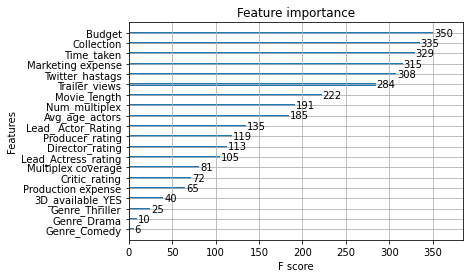

In [150]:
xgb.plot_importance(xgb_clf)

In [151]:
confusion_matrix(y_test, xgb_clf.predict(X_test))

array([[26, 18],
       [15, 43]])

In [152]:
accuracy_score(y_test, xgb_clf.predict(X_test))

0.6764705882352942